In [1]:
import pandas as pd
import numpy as np
from io import BytesIO
import requests
import json

# Gathering Data for this Project

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

response = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")
image_predictions = pd.read_csv(BytesIO(response.content) , sep="\t" )


In [9]:
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

ModuleNotFoundError: No module named 'tweepy'

In [3]:

tweet_json = pd.read_json("tweet-json.txt" , lines=True)

# Assessing 

In [4]:
twitter_archive.tail()

twitter_archive.query('tweet_id==666049248165822465')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None


In [5]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [6]:
twitter_archive[["doggo" , "floofer" , "pupper" , "puppo"] ].describe()


,doggo,floofer,pupper,puppo
count,2356,2356,2356,2356
unique,2,2,2,2
top,None,None,None,None
freq,2259,2346,2099,2326


In [7]:
twitter_archive.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
            ... 
Sage           1
Reagan         1
Ralphson       1
Sailer         1
Charleson      1
Name: name, Length: 957, dtype: int64

In [8]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [9]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [10]:
tweet_json.sample(10)



,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
2198,2015-11-23 04:59:42+00:00,668655139528511488,668655139528511488,Say hello to Winifred. He is a Papyrus Hydrang...,False,"[0, 112]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 668655136865181697, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,562,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1455,2016-02-04 04:03:57+00:00,695095422348574720,695095422348574720,This is just a beautiful pupper good shit evol...,False,"[0, 82]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 695095415818096640, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2888,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
403,2017-01-24 22:44:42+00:00,824025158776213504,824025158776213504,"""I wish we were dogs"" 14/10 for @BadlandsNPS h...",False,"[0, 44]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,5255,False,False,0.0,0.0,en,NaN,8.239662e+17,8.239662e+17,{'created_at': 'Tue Jan 24 18:50:25 +0000 2017...
467,2017-01-05 17:13:55+00:00,817056546584727552,817056546584727552,This is Chloe. She fell asleep at the wheel. A...,False,"[0, 107]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 817056537596207104, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,9517,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1277,2016-03-13 02:43:08+00:00,708845821941387268,708845821941387264,Here's a pupper with magic eyes. Not wearing a...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 708845814165192704, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,3226,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1407,2016-02-15 02:38:53+00:00,699060279947165696,699060279947165696,This is Yukon. He pukes rainbows. 12/10 magica...,False,"[0, 74]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",NaN,...,4173,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
847,2016-08-17 20:27:34+00:00,766008592277377025,766008592277377024,This is Angel. She stole the @ShopWeRateDogs s...,False,"[0, 113]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 766008557347233792, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,4149,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1562,2016-01-15 21:52:49+00:00,688116655151435777,688116655151435776,Please send dogs. I'm tired of seeing other st...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 688116647345848321, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,3093,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1586,2016-01-12 02:06:41+00:00,686730991906516992,686730991906516992,I just love this picture. 12/10 lovely af http...,False,"[0, 65]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 686730987418550272, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,4543,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1306,2016-03-08 20:09:54+00:00,707297311098011648,707297311098011648,This is Cassie. She can go from sweet to scary...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 707297296074072065, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,3022,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [11]:
tweet_json.user[0]

{'id': 4196983835,
 'id_str': '4196983835',
 'name': 'WeRateDogs™ (author)',
 'screen_name': 'dog_rates',
 'location': 'DM YOUR DOGS, WE WILL RATE',
 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com',
 'url': 'https://t.co/N7sNNHAEXS',
 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS',
     'expanded_url': 'http://weratedogs.com',
     'display_url': 'weratedogs.com',
     'indices': [0, 23]}]},
  'description': {'urls': []}},
 'protected': False,
 'followers_count': 3200889,
 'friends_count': 104,
 'listed_count': 2784,
 'created_at': 'Sun Nov 15 21:41:29 +0000 2015',
 'favourites_count': 114031,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': True,
 'statuses_count': 5288,
 'lang': 'en',
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': '000000',
 'prof

In [12]:
tweet_json.query('is_quote_status == True')
tweet_json.retweet_count.head()

0    8853
1    6514
2    4328
3    8964
4    9774
Name: retweet_count, dtype: int64

In [13]:
tweet_json.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

# issues

## Quality

### twitter_archive table
- `source` column : unnessary  tag ```<a>``` we just need the text between a tag ex '```<a href="www.test.com">text  we want </a>'``` 

- `timestamp` column should be in dateTime type instead of object (string)  
- `name` column has 745 missing value for dog name and 55 dog called a which is weird to have a dog called a


### twitter_archive_clean table (as we know the wrangle process can be iterative)
- `dog_types` has 9030 missing values
- `dog_types` instead of "None" which is string we want to convert it to NaN (null) for accuracy
- `tweet_id` there is just 2356 unique tweet id from 9424 which mean whe have 7068 duplicated value


- issue with completeness with these columns 
```
    in_reply_to_status_id       87 non-null     float64            
    in_reply_to_user_id         87 non-null     float64                       
    retweeted_status_id         219 non-null    float64            
    retweeted_status_user_id    219 non-null    float64            
    retweeted_status_timestamp  219 non-null    object 
 ```
 
- drop rating_denominator as it has the same value a crross rows (10)

- This columns should have type integer instead of float since there is no fraction 
```
retweet_count               2747 non-null   float64            
favorite_count              2747 non-null   float64 
 ```
- and replace NaN by the mean of the column to can convert this column type into integer
 
- `tweet_id` it has integer type but we will not do any math caculation so it should be as string  


## image_predictions table
- desktop_computer , microphone , coffee_mug , pencil	is not a dog types name 
 

## tidy

- `doggo floofer pupper puppo`Fine For Humans – Not So Good For Analysis we need to reshape this
- merge the twitter_archive with tweet_json to get more insights 


# Clean

In [15]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean =  tweet_json.copy()

## Define

- extract the content between tags in source column for twitter_archive table

## Code

In [16]:
 twitter_archive_clean.source = twitter_archive_clean.source.str.extract(">(\w+\D+)</a>")

## test

In [17]:
twitter_archive_clean.source.sample(5)

2039    Twitter for iPhone
2104    Twitter for iPhone
1074    Twitter for iPhone
1262    Twitter for iPhone
355     Twitter for iPhone
Name: source, dtype: object

## Define
Convert `timestamp` column type from object to date time type using astype method

## Code

In [18]:
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

# Test

In [19]:
twitter_archive_clean.timestamp.sample(10)

963    2016-07-06 15:54:42+00:00
1208   2016-04-01 00:58:13+00:00
189    2017-04-22 19:05:32+00:00
1374   2016-02-23 02:12:47+00:00
1134   2016-05-06 18:33:34+00:00
1572   2016-01-14 15:57:26+00:00
1062   2016-06-10 02:48:49+00:00
35     2017-07-13 15:19:09+00:00
1716   2015-12-25 02:01:30+00:00
9      2017-07-26 15:59:51+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

## Define
reshape twitter_archive_clean table using melt function to compine `doggo	floofer	pupper	puppo` into one column called  dog_types

## code

In [20]:
id_vars = list(twitter_archive_clean)[:-4]

In [21]:
twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars=id_vars   , value_name="dogs_types")
twitter_archive_clean.drop(columns="variable" , inplace =True)

## Test

In [22]:
twitter_archive_clean.sample(5)
twitter_archive_clean.dogs_types.value_counts()

None       9030
pupper      257
doggo        97
puppo        30
floofer      10
Name: dogs_types, dtype: int64

##  Define 
- replace missing values for dog_types col by predection p1 so we need to merge p1 to make your life easy
- Convert "None" value in dog type into NaN (null)

## code

In [23]:
twitter_archive_clean = pd.merge(twitter_archive_clean , image_predictions_clean.iloc[:, np.r_[0,3]] , how="left" , on = ["tweet_id"])

In [24]:
twitter_archive_clean.dogs_types.replace("None" , np.nan , inplace=True)
twitter_archive_clean["dog_types"]=twitter_archive_clean[["dogs_types", "p1"]].fillna(method="backfill" , axis=1 ).iloc[:,:1]
twitter_archive_clean.drop(columns=["dogs_types" , "p1" ] , inplace=True)

## Test

In [25]:
twitter_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_types
8448,701214700881756160,NaN,NaN,2016-02-21 01:19:47+00:00,Twitter for iPhone,"I'm not sure what's happening here, but it's p...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/701214700...,12,10,None,Chihuahua
3627,709409458133323776,NaN,NaN,2016-03-14 16:02:49+00:00,Twitter for iPhone,This is Billy. He sensed a squirrel. 8/10 damn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709409458...,8,10,Billy,Shetland_sheepdog
451,818627210458333184,NaN,NaN,2017-01-10 01:15:10+00:00,Twitter for iPhone,Meet Wafer. He represents every fiber of my be...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/818627210...,13,10,Wafer,Labrador_retriever
454,818536468981415936,NaN,NaN,2017-01-09 19:14:36+00:00,Twitter for iPhone,This is Tom. He's a silly dog. Known for his u...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/818536468...,11,10,Tom,swing
7215,863432100342583297,NaN,NaN,2017-05-13 16:33:49+00:00,Twitter for iPhone,This is Belle. She's never been more pupset. E...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863432100...,12,10,Belle,Staffordshire_bullterrier


## Define
- Compine the favourit_count , retweet count ,and lang to twitter_archive_clean using `merge` and specify column using `np.r_`

## Code

In [26]:
twitter_archive_clean = pd.merge(twitter_archive_clean , tweet_json_clean.iloc[:,np.r_[1,20,21,26]] , how="left", left_on="tweet_id"  , right_on="id")

In [27]:
twitter_archive_clean.drop(columns="id" , inplace =True)

## Test

In [28]:
twitter_archive_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_types,retweet_count,favorite_count,lang
378,827933404142436356,NaN,NaN,2017-02-04 17:34:40+00:00,Twitter for iPhone,This is Kona. Yesterday she stopped by the dep...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/827933404...,12,10,Kona,German_shepherd,5987.0,22180.0,en
1579,687312378585812992,NaN,NaN,2016-01-13 16:36:55+00:00,Twitter for iPhone,"""You got any games on your phone"" 7/10 for inv...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/687312378...,7,10,None,seat_belt,2146.0,4777.0,en
3025,790227638568808452,NaN,NaN,2016-10-23 16:25:25+00:00,Twitter for iPhone,RT @dog_rates: This is Leela. She's a Fetty Wo...,7.626999e+17,4.196984e+09,2016-08-08 17:19:51 +0000,https://twitter.com/dog_rates/status/762699858...,11,10,Leela,NaN,4190.0,0.0,en
7873,772114945936949249,NaN,NaN,2016-09-03 16:52:02+00:00,Twitter for iPhone,This is Finn. He's very nervous for the game. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772114945...,10,10,Finn,Chihuahua,546.0,3005.0,en
8702,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44+00:00,Twitter for iPhone,"Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,None,golden_retriever,239.0,1369.0,en
1346,704480331685040129,NaN,NaN,2016-03-01 01:36:14+00:00,Twitter for iPhone,Meet Lucia. She's a Cumulonimbus Floofmallow. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704480331...,11,10,Lucia,Samoyed,1197.0,3723.0,en
5165,818588835076603904,NaN,NaN,2017-01-09 22:42:41+00:00,Twitter for iPhone,RT @dog_rates: This is Chelsea. She forgot how...,7.735476e+17,4.196984e+09,2016-09-07 15:44:53 +0000,https://twitter.com/dog_rates/status/773547596...,11,10,Chelsea,pupper,7126.0,0.0,en
370,828409743546925057,NaN,NaN,2017-02-06 01:07:28+00:00,Twitter for iPhone,This is Mutt Ryan. He's quite confident at the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/828409743...,12,10,Mutt,teddy,1305.0,6898.0,en
2435,877556246731214848,NaN,NaN,2017-06-21 15:58:08+00:00,Twitter for iPhone,This is Penny. She's both pupset and fired pup...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/877556246...,12,10,Penny,basset,3994.0,23258.0,en
5064,831315979191906304,NaN,NaN,2017-02-14 01:35:49+00:00,Twitter Web Client,I couldn't make it to the #WKCDogShow BUT I ha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/831315979...,13,10,None,pupper,1264.0,7117.0,en


# assess

In [29]:
len(twitter_archive_clean['tweet_id'].unique())

2356

In [30]:
twitter_archive_clean.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
dog_types                      382
retweet_count                 1724
favorite_count                2007
lang                             9
dtype: int64

In [31]:
twitter_archive_clean.query('tweet_id == "666049248165822465"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_types,retweet_count,favorite_count,lang
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,miniature_pinscher,41.0,111.0,en
4707,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,miniature_pinscher,41.0,111.0,en
7063,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,miniature_pinscher,41.0,111.0,en
9419,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,miniature_pinscher,41.0,111.0,en


In [32]:
twitter_archive_clean.shape

(9424, 17)

## Define

- Remove duplicated rows from twitter_archive_clean using `pd.drop_duplicates` method

## Code

In [33]:
twitter_archive_clean.drop_duplicates(inplace =True)

## test

In [34]:
twitter_archive_clean.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
dog_types                      382
retweet_count                 1724
favorite_count                2007
lang                             9
dtype: int64

In [35]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2750 entries, 0 to 8151
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2750 non-null   int64              
 1   in_reply_to_status_id       87 non-null     float64            
 2   in_reply_to_user_id         87 non-null     float64            
 3   timestamp                   2750 non-null   datetime64[ns, UTC]
 4   source                      2750 non-null   object             
 5   text                        2750 non-null   object             
 6   retweeted_status_id         219 non-null    float64            
 7   retweeted_status_user_id    219 non-null    float64            
 8   retweeted_status_timestamp  219 non-null    object             
 9   expanded_urls               2685 non-null   object             
 10  rating_numerator            2750 non-null   int64           

## Define 

-  drop this columns 
```
   rating_denominator
  in_reply_to_status_id       87 non-null     float64            
  in_reply_to_user_id         87 non-null     float64                       
  retweeted_status_id         219 non-null    float64            
  retweeted_status_user_id    219 non-null    float64            
  retweeted_status_timestamp  219 non-null    object
  ```

## code

In [36]:
columns = ["in_reply_to_status_id" , "in_reply_to_user_id" , "retweeted_status_id" , "retweeted_status_user_id" ,  "retweeted_status_timestamp"  ,"rating_denominator"]

twitter_archive_clean.drop(columns = columns , inplace=True )

## Test

In [37]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,dog_types,retweet_count,favorite_count,lang
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,orange,8853.0,39467.0,en
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,Chihuahua,6514.0,33819.0,en
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,Chihuahua,4328.0,25461.0,en
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,paper_towel,8964.0,42908.0,en
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,basset,9774.0,41048.0,en


## Define
- convert tweet_id into string
- convert retweet_count	 , favorite_count into integer

## Code

In [38]:
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)

#  replace NaN by the mean of the column to can convert the column type into integer

mean_retweet_count =twitter_archive_clean.retweet_count.mean()
twitter_archive_clean.retweet_count.replace(np.nan  , mean_retweet_count , inplace=True)

mean_favorite_count =twitter_archive_clean.favorite_count.mean()
twitter_archive_clean.favorite_count.replace(np.nan  , mean_favorite_count , inplace=True)

twitter_archive_clean.retweet_count = twitter_archive_clean.retweet_count.astype(int)
twitter_archive_clean.favorite_count = twitter_archive_clean.favorite_count.astype(int)

## test

In [39]:
twitter_archive_clean.retweet_count.isna().sum()

0

In [40]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2750 entries, 0 to 8151
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          2750 non-null   object             
 1   timestamp         2750 non-null   datetime64[ns, UTC]
 2   source            2750 non-null   object             
 3   text              2750 non-null   object             
 4   expanded_urls     2685 non-null   object             
 5   rating_numerator  2750 non-null   int64              
 6   name              2750 non-null   object             
 7   dog_types         2469 non-null   object             
 8   retweet_count     2750 non-null   int32              
 9   favorite_count    2750 non-null   int32              
 10  lang              2747 non-null   object             
dtypes: datetime64[ns, UTC](1), int32(2), int64(1), object(7)
memory usage: 236.3+ KB


# Storing

In [44]:
twitter_archive_clean.to_csv("twitter_archive_master.csv" , index= False)

## Analyzing, and Visualizing Data

In [41]:
df = pd.read_csv("twitter_archive_master.csv")


## What are the 10 most famous dog types?
we can know this by count how many tweet talk about this type of dog


Text(0, 0.5, 'percentage')

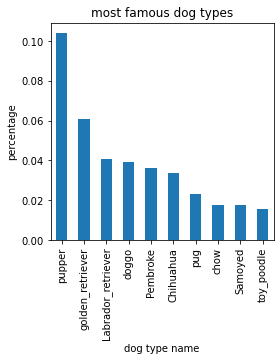

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

df.dog_types.value_counts(normalize=True)[:10].plot(kind="bar", title="most famous dog types" , figsize=(4,4))
plt.xlabel("dog type name")
plt.ylabel("percentage")


# what is the most favourit type  of dogs?
we can know this by sum likes and retweet then sorting by favorite_count then , retweet_count

In [129]:
df.groupby("dog_types").sum().iloc[:,2:].sort_values(["favorite_count" ,"retweet_count"] ,ascending=[False, False])

,retweet_count,favorite_count
dog_types,,
pupper,766777.0,1736592.0
golden_retriever,581170.0,1696627.0
doggo,707663.0,1488466.0
Labrador_retriever,427343.0,1123850.0
Pembroke,283701.0,1003092.0
...,...,...
desktop_computer,37.0,108.0
envelope,882.0,0.0
coffee_mug,482.0,0.0


## What is the averge rating for African_hunting_dog ?

In [60]:
df.query('dog_types == "African_hunting_dog"').mean()["rating_numerator"] / 10

0.8

# create a summery for a pug dog type

In [158]:
df.query('dog_types == "pug"')["rating_numerator"].describe()

count    57.000000
mean     10.315789
std       1.891314
min       3.000000
25%      10.000000
50%      10.000000
75%      11.000000
max      13.000000
Name: rating_numerator, dtype: float64

Text(0, 0.5, 'rating')

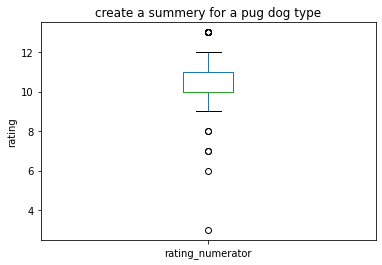

In [63]:
df.query('dog_types == "pug"')["rating_numerator"].plot(kind="box")
plt.title("create a summery for a pug dog type")
plt.ylabel("rating")